# Linear Regression

Linear Regression is a predictive model that captures the relationship between a quantitative target variable and multiple (or one) independent variables. It is a parametric algorithm which models the following function:  

ŷ = b + w1x1 + w2x2 + ⋯ + wnxn
                   
Where:

- $ŷ$ is the target variable
- $n$ is the number of features
- $x$ is the feature vector
- $b$ is the bias term
- $w$ are the weights

# Training Process

The model estimates the parameters w and b during the training process such that the sum of least squares is minimized. This is usually carried out using an optimizer like gradient descent. The optimizer calculates the partial derivatives of $w$ and $b$ with respect to the cost function. The cost function in the case of linear regression is convex, therefore gradient descent is able to find the global minimum.

Once the models parameters $w$ and $b$ are estimated, predictions are computed using a weighted sum of input features plus the bias term.

# Evaluation Metrics

We can evaluate the models performance using traditional regression metrics such as MSE, RMSE and MAE. Moreover we can also retreive the Coefficient of Determination *R^2* which takes a value between 0 and 1. *R^2*  indicates the  proportion of variability in $Y$ that can be explained by $X$. Values closer to one are favourable. 


# Linear Regression Assumptions

- Linearity between independent and dependent variables
- Residual normality
- Homoscedasticity (constant residual variance) 
- No multicolinearity
- No colinearity
- No outliers

# Pros and Cons of Linear Regression

**Pros**

- Easy to interpret and make statistical inferences.
- Performs well on linearly seperable datasets.


**Cons**

- Makes many assumptions of the data
- Does not perform well on non-linear data

# Regularization

Ridge (L2), Lasso (l1) and Elasticnet regularization can be implemented in order to control the bias-variance tradeoff. 

**Ridge Regression**

The regularized version of linear regression is called ridge regression. A regularization term alpha ***α*** is added to the cost function during training in order to constraint the model. larger alpha values increase bias and reduce variance. Once the model is trained, we evaluate the model using the unregularized metric. 

**Lasso Regression**

Similarly, LASSO regression adds an l1 penalty to the loss function. This procedure eliminates the weights of the least important features and therefore performs feature selection for us. This tends to produce a sparse output with few non-zero feature weights. 

**Elastic Net**

This method combines ridge and lasso regression and the ratio of both types of regularization can be controlled using using an r ratio. When $r = 1$ elastic net is the same as ridge regressoon, while $r = 0$ implies lasso regression.

**What regularization to apply ?**

We want to use lasso when most features are useless. However if the number of features is greater than the number of training instances then Elastic Net or Ridge regression is preferred.  Moreover, if the dataset has high multicollinearity lasso can be unstable.

# 1. Import Modules

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# 2. Import and Visualize Data

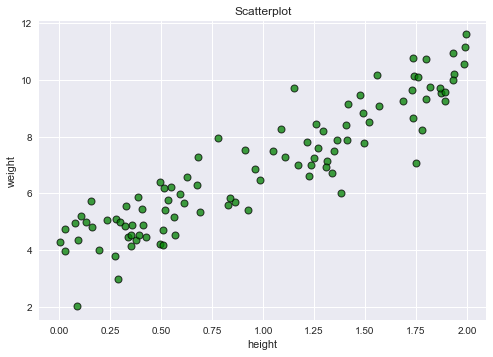

In [2]:
# Linear Data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
plt.style.use('seaborn')
plt.scatter(X, y, c = 'green', edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75,
            cmap = 'greens')

plt.title('Scatterplot')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

# 3. Training

In [3]:
# Linear regression method 
reg = LinearRegression()

# Fit model
reg.fit(X,y)

# Retrieve R2
print(f' R2 Score: {reg.score(X, y)}')

# Summarize Linear Regression Model
#X = sm.add_constant(X)
model = sm.OLS(y, sm.add_constant(X)).fit()

# View model summary
print(model.summary())

 R2 Score: 0.8405540763075928
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     516.6
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           7.42e-41
Time:                        17:28:40   Log-Likelihood:                -127.08
No. Observations:                 100   AIC:                             258.2
Df Residuals:                      98   BIC:                             263.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7766 

# 4. Visualize Results

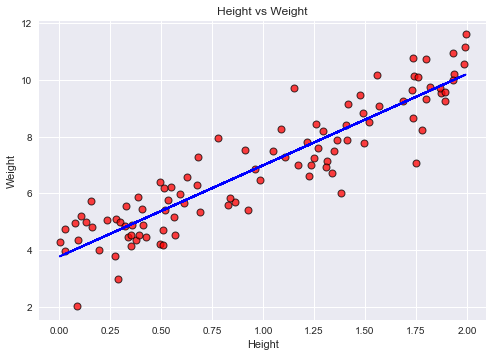

In [4]:
# Visualising the Linear Regression
plt.style.use('seaborn')
plt.scatter(X, y, c = 'red', edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75,
            cmap = 'greens')
plt.plot(X, reg.predict(X), color = 'blue')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Stochastic Gradient Descent

In [5]:
# Stochastic gradient descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # penalty can be changed to 'l1' or 'l2'
# Fit model
sgd_reg.fit(X, y.ravel())
# Retrieve R2
print(f' R2 Score: {sgd_reg.score(X, y)}')
sgd_reg.intercept_, sgd_reg.coef_

 R2 Score: 0.8404708359509073


(array([3.76447638]), array([3.20884784]))

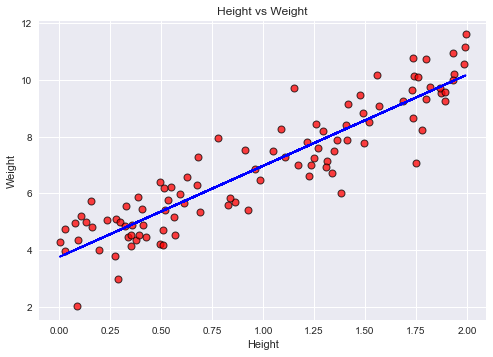

In [6]:
# Visualising the SGD Regression
plt.style.use('seaborn')
plt.scatter(X, y, c = 'red', edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75,
            cmap = 'greens')
plt.plot(X, sgd_reg.predict(X), color = 'blue')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# 5. Regularization

In [7]:
# L2 regularization Ridge Regression
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
print(f' R2 Score: {ridge_reg.score(X, y)}')

 R2 Score: 0.8399985020738964


# L1 Regularization

In [8]:
# L1 regularization
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
print(f' R2 Score: {lasso_reg.score(X, y)}')

 R2 Score: 0.8348955209252369


# Elastic Net

In [9]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print(f' R2 Score: {elastic_net.score(X, y)}')

 R2 Score: 0.8209285036899874


# Polynomial Regression

In [22]:
# Polynomial Regression
poly_reg = PolynomialFeatures(degree = 9)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
print(f' R2 Score: {lin_reg_2.score(X_poly, y)}')

 R2 Score: 0.8558448827469418


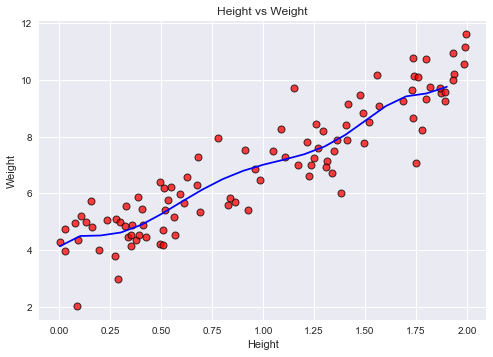

In [23]:
# Visualising the Polynomial Regression 
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.style.use('seaborn')
plt.scatter(X, y, c = 'red', edgecolor = 'black',
            linewidth = 1,
            alpha = 0.75,
            cmap = 'greens')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()